# Data Pre-processing

#### Understanding structure of data 
Identifying Continuous and Categorical data
Handling Missing data
Methods to identify outliers
Measuring centrality of data
Measuring spread of data

In [2]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pylab as plt
from pandas.api.types import CategoricalDtype
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import cross_val_score , GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV 
import seaborn as sns
import datetime as dt
import random
import scipy.stats as stats
%matplotlib inline 
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [3]:
#!pip install pandas plotnine
from plotnine import *

## Reading Data

In [4]:
df = pd.read_csv("data/owid-covid-data.csv",parse_dates=['date'])

#### Looking at top 10 rows of data

In [5]:
df.head(10)

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
5,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
6,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
7,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
8,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
9,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83


### Data Understanding And EDA

#### Converting data types

In [6]:
df['date']=df['date'].dt.strftime("%m-%d-%Y")
df.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,12-31-2019,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,01-01-2020,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,01-02-2020,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,01-03-2020,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,01-04-2020,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83


In [7]:
df['date']= pd.to_datetime(df['date'])
assert df['date'].dtype=='datetime64[ns]'

In [8]:
df.dtypes

iso_code                                   object
continent                                  object
location                                   object
date                               datetime64[ns]
total_cases                               float64
new_cases                                 float64
total_deaths                              float64
new_deaths                                float64
total_cases_per_million                   float64
new_cases_per_million                     float64
total_deaths_per_million                  float64
new_deaths_per_million                    float64
new_tests                                 float64
total_tests                               float64
total_tests_per_thousand                  float64
new_tests_per_thousand                    float64
new_tests_smoothed                        float64
new_tests_smoothed_per_thousand           float64
tests_units                                object
stringency_index                          float64


In [ ]:
#df['year']=df.date.year
#df['month']=df.date.month
#df.head()

In [9]:
df = df.set_index('date')
df.head(3)

,iso_code,continent,location,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
date,,,,,,,,,,,,,,,,,,,,,
2019-12-31,AFG,Asia,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2020-01-01,AFG,Asia,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2020-01-02,AFG,Asia,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83


#### Looking at all the variables and other data types

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 33417 entries, 2019-12-31 to 2020-03-10
Data columns (total 33 columns):
iso_code                           33353 non-null object
continent                          33141 non-null object
location                           33417 non-null object
total_cases                        33062 non-null float64
new_cases                          33062 non-null float64
total_deaths                       33062 non-null float64
new_deaths                         33062 non-null float64
total_cases_per_million            32998 non-null float64
new_cases_per_million              32998 non-null float64
total_deaths_per_million           32998 non-null float64
new_deaths_per_million             32998 non-null float64
new_tests                          10401 non-null float64
total_tests                        10647 non-null float64
total_tests_per_thousand           10647 non-null float64
new_tests_per_thousand             10401 non-null float64
new_tes

There are 33417 observations and 34 columns where 5 variables are of categorical data type and the remaining 29 variables are of numerical data types

#### The following is a list of names of variables in this data set


In [11]:
df.columns

Index(['iso_code', 'continent', 'location', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'tests_units',
       'stringency_index', 'population', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy'],
      dtype='object')

#### Describing and Summarizing numerical or continuous variables

In [12]:
df.describe()

,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,new_tests,total_tests,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
count,3.306200e+04,33062.000000,33062.000000,33062.00000,32998.000000,32998.000000,32998.000000,32998.000000,10401.000000,1.064700e+04,...,29919.000000,29708.000000,19865.000000,30083.000000,31104.000000,23877.000000,23591.000000,13764.000000,27353.000000,32951.000000
mean,5.091939e+04,1010.762809,2655.291634,39.93243,1103.657007,17.858746,40.909829,0.533204,16320.258341,7.689958e+05,...,5.990319,21546.066343,11.489011,249.517591,8.039533,10.990606,32.629508,53.246010,3.146980,74.244388
std,5.180225e+05,9309.139517,25233.329557,347.73264,2674.940362,62.928423,123.250689,3.006846,59168.420750,3.022411e+06,...,4.362110,20697.420278,18.736936,117.957827,4.116805,10.504692,13.328649,31.456423,2.549325,7.316460
min,0.000000e+00,-29726.000000,0.000000,-1918.00000,0.000000,-437.881000,0.000000,-41.023000,-3743.000000,1.000000e+00,...,0.526000,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000
25%,2.100000e+01,0.000000,0.000000,0.00000,8.521500,0.000000,0.000000,0.000000,805.000000,2.585100e+04,...,2.162000,6171.884000,0.500000,153.493000,5.310000,1.900000,21.400000,22.863000,1.380000,70.390000
50%,4.460000e+02,5.000000,9.000000,0.00000,155.458000,0.773000,2.043000,0.000000,2766.000000,1.105140e+05,...,4.458000,15183.616000,1.700000,235.954000,7.110000,6.434000,31.400000,55.182000,2.540000,75.860000
75%,5.066500e+03,102.000000,107.000000,2.00000,936.628000,10.572000,21.692000,0.140000,9307.000000,4.324700e+05,...,9.720000,33132.320000,15.000000,318.949000,10.080000,19.600000,40.900000,83.741000,4.210000,80.100000
max,1.670892e+07,284710.000000,660123.000000,10512.00000,38138.741000,4944.376000,1237.551000,200.040000,929838.000000,5.063568e+07,...,18.493000,116935.600000,77.600000,724.417000,23.360000,44.000000,78.100000,98.999000,13.800000,86.750000


### Feature Selection
#### Dropping unnecessary and redundant numerical columns before analyzing data

In [13]:
df.isna().sum()

iso_code                              64
continent                            276
location                               0
total_cases                          355
new_cases                            355
total_deaths                         355
new_deaths                           355
total_cases_per_million              419
new_cases_per_million                419
total_deaths_per_million             419
new_deaths_per_million               419
new_tests                          23016
total_tests                        22770
total_tests_per_thousand           22770
new_tests_per_thousand             23016
new_tests_smoothed                 21897
new_tests_smoothed_per_thousand    21897
tests_units                        21129
stringency_index                    6287
population                            64
population_density                  1507
median_age                          3343
aged_65_older                       3779
aged_70_older                       3498
gdp_per_capita  

There are a total number of 33417 observations and the following variables have more than 60% of data as missing values. 

new_tests, total_tests, total_tests_per_thousand, new_tests_per_thousand, new_tests_smoothed, new_tests_smoothed_per_thousand, tests_units, 

and the variable "handwashing_facilities"  has 19653 close to 60% of data as missing values.

Therefore, these variables should be removed in order to avoid any bias in modeling. The variable extreme_poverty is also having 40% of its values as missing values. However, we will try to consider this variable as it has less than 50% of its missing values. 


In [14]:
df.drop(['new_tests', 'total_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'tests_units', 'handwashing_facilities'], axis = 1, inplace = True)

The below mentioned variables should also be removed as these are conversions per million. We would prefer to use per million numbers in general compared to just numbers, however, there are more missing values in variables using per million as conversions. Therefore, we stick to the original variables.

total_cases_per_million, new_cases_per_million, total_deaths_per_million, and new_deaths_per_million

In [15]:
df.drop(['total_cases_per_million', 'new_cases_per_million', 'total_deaths_per_million', 'new_deaths_per_million'], axis = 1, inplace = True)

Because Population Density is calculated using Population, we need to remove Population

In [16]:
df.drop(['population'], axis = 1, inplace = True)

In [17]:
df.shape

(33417, 20)

#### Describing and Summarizing categorical variables

In [18]:
df.describe(include = 'O')

,iso_code,continent,location
count,33353,33141,33417
unique,211,6,212
top,ISL,Europe,Norway
freq,212,9113,212


In [19]:
df["continent"].head()

date
2019-12-31    Asia
2020-01-01    Asia
2020-01-02    Asia
2020-01-03    Asia
2020-01-04    Asia
Name: continent, dtype: object

In [20]:
df["location"].tail()

date
2020-02-28    International
2020-02-29    International
2020-03-01    International
2020-03-02    International
2020-03-10    International
Name: location, dtype: object

In [21]:
df["iso_code"].tail()

date
2020-02-28    NaN
2020-02-29    NaN
2020-03-01    NaN
2020-03-02    NaN
2020-03-10    NaN
Name: iso_code, dtype: object

#### Drop specific rows

Looking at the categorical variables. Some of the rows for iso_code have no values and corresponding continent doesn't have any values as well. There is only one value corresponding location and that is only "International". Therefore, we won't be able to  track location with a single value. Thus, we should remove these rows. There are only 64 such rows with no values in iso_code variables. Therefore, removing such a small data will not affect our model. 

In [22]:
df = df.dropna(how='all', subset=['iso_code'])

#### Looking at shape of new dataset 

We now have 33353 observations instead of 33353 observations and 20 variables instead of 34 variables.

In [23]:
df.shape

(33353, 20)

All the names of variables in our current data set are listed below

In [24]:
df.isna().sum()

iso_code                          0
continent                       212
location                          0
total_cases                     355
new_cases                       355
total_deaths                    355
new_deaths                      355
stringency_index               6223
population_density             1443
median_age                     3279
aged_65_older                  3715
aged_70_older                  3434
gdp_per_capita                 3645
extreme_poverty               13488
cardiovasc_death_rate          3270
diabetes_prevalence            2249
female_smokers                 9476
male_smokers                   9762
hospital_beds_per_thousand     6000
life_expectancy                 402
dtype: int64

We can observe that now with our already reduced data the variable extreme poverty has almost half values missing and therefore the better way would be to delete this column as imputing it would lead to misleading results. Even male and female smokers have very high values.

In [25]:
df.drop(['extreme_poverty','female_smokers','male_smokers'], axis = 1, inplace = True)

In [26]:
df.columns

Index(['iso_code', 'continent', 'location', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'stringency_index', 'population_density',
       'median_age', 'aged_65_older', 'aged_70_older', 'gdp_per_capita',
       'cardiovasc_death_rate', 'diabetes_prevalence',
       'hospital_beds_per_thousand', 'life_expectancy'],
      dtype='object')

In [27]:
df.head()

,iso_code,continent,location,total_cases,new_cases,total_deaths,new_deaths,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,hospital_beds_per_thousand,life_expectancy
date,,,,,,,,,,,,,,,,,
2019-12-31,AFG,Asia,Afghanistan,0.0,0.0,0.0,0.0,NaN,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,0.5,64.83
2020-01-01,AFG,Asia,Afghanistan,0.0,0.0,0.0,0.0,0.0,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,0.5,64.83
2020-01-02,AFG,Asia,Afghanistan,0.0,0.0,0.0,0.0,0.0,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,0.5,64.83
2020-01-03,AFG,Asia,Afghanistan,0.0,0.0,0.0,0.0,0.0,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,0.5,64.83
2020-01-04,AFG,Asia,Afghanistan,0.0,0.0,0.0,0.0,0.0,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,0.5,64.83


## Graphical Exploratory Analysis

Before we go deeper into the dataset, it is good to perform some graphical exploratory analysis as we can quickly see and find issues with the data

In [28]:
df.groupby('continent').size()

continent
Africa           7479
Asia             8274
Europe           9113
North America    5047
Oceania          1253
South America    1975
dtype: int64

<AxesSubplot:xlabel='continent', ylabel='count'>

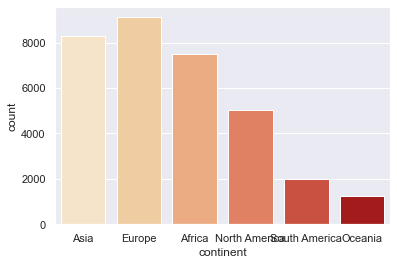

In [29]:
sns.countplot(x='continent',data=df, palette="OrRd")

<AxesSubplot:ylabel='continent'>

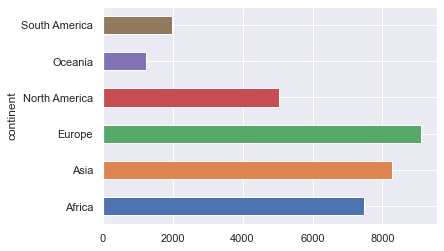

In [30]:
# Horizontal bar plot
continents = df.groupby("continent").size()
continents.plot.barh(stacked=False)

The above graph shows that Europe has majority of the cases

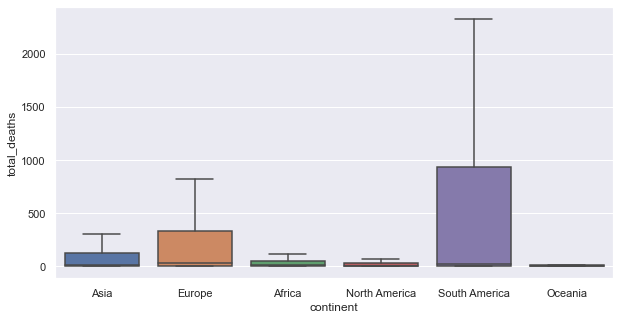

In [28]:
plt.figure(figsize=(10,5))
ax = sns.boxplot(x="continent", y="total_deaths", data=df, showfliers=False)

Based on the above boxplots, the number of deaths are highest in Europe followed by South America, Africa, Asia, North America, and Oceania.

#### Let's explore the population density in these continents

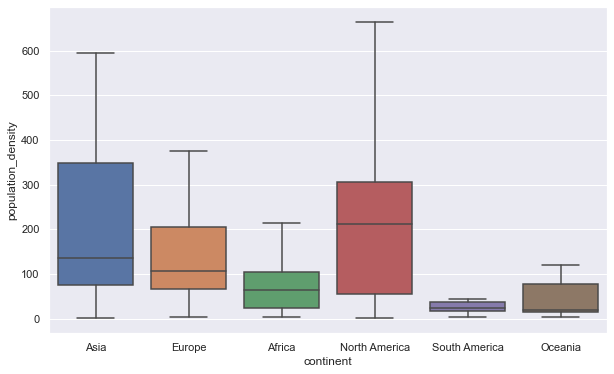

In [29]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(x="continent", y="population_density", data=df, showfliers=False)

The above chart shows that the population density is highest in North America followed by Asia, Europe, Africa, Oceania, and last South America. Therefore, even though Europe seem to have highest number of deaths and North America among the least number of deaths, it is important to consider that North America has higher population density compared to Europe.  

Therefore, by comparing the above two plots, it is surprising that South America has the more number of deaths among all as it has the lesser population density. There can be several factors affecting the death rate. But this is probably because people in South America are not taking as good of a precaution as some other continents.Also, it is important to note that North America has high population density and surprisngly, North America has one of the least number of deaths. This means that more precautions and other methods are in place at North America when compared to Europe to beat the COVID-19 situation.

#### Let's explore the number of cases by continent

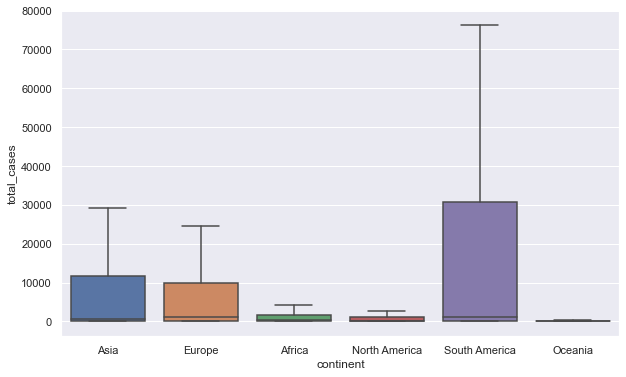

In [49]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(x="continent", y="total_cases", data=df, showfliers=False)

Clearly, Europe and South America have the highest number of cases and so has highest number of deaths

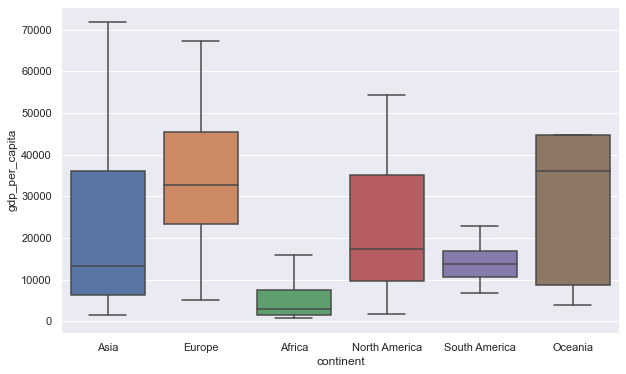

In [50]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(x="continent", y="gdp_per_capita", data=df, showfliers=False)

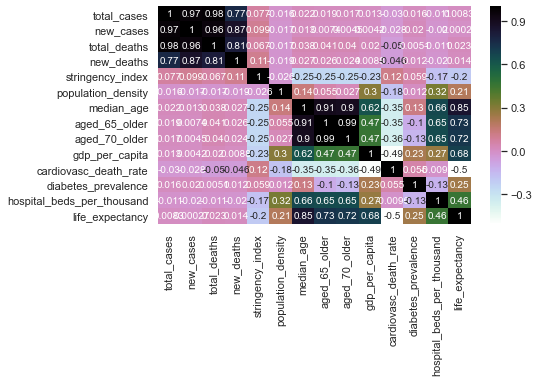

In [31]:
# heatmap for the correlation matrix
plt.figure(figsize=(7,4))
sns.heatmap(df.corr(),annot=True,cmap='cubehelix_r')
plt.show()

In [55]:
df.describe()

,total_cases,new_cases,total_deaths,new_deaths,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy
count,3.299800e+04,32998.000000,32998.000000,32998.000000,27130.000000,31910.000000,30074.000000,29638.000000,29919.000000,29708.000000,19865.000000,30083.000000,31104.000000,23877.000000,23591.000000,27353.000000,32951.000000
mean,5.101779e+04,1012.702103,2660.440057,40.009667,58.327987,368.561392,31.634754,9.450372,5.990319,21546.066343,11.489011,249.517591,8.039533,10.990606,32.629508,3.146980,74.244388
std,5.185198e+05,9318.058677,25257.517537,348.065275,29.773501,1680.063490,9.012636,6.375376,4.362110,20697.420278,18.736936,117.957827,4.116805,10.504692,13.328649,2.549325,7.316460
min,0.000000e+00,-29726.000000,0.000000,-1918.000000,0.000000,0.137000,15.100000,1.144000,0.526000,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,0.100000,53.280000
25%,2.100000e+01,0.000000,0.000000,0.000000,37.960000,39.497000,24.400000,3.607000,2.162000,6171.884000,0.500000,153.493000,5.310000,1.900000,21.400000,1.380000,70.390000
50%,4.470000e+02,5.000000,9.000000,0.000000,67.590000,90.672000,31.800000,7.104000,4.458000,15183.616000,1.700000,235.954000,7.110000,6.434000,31.400000,2.540000,75.860000
75%,5.105500e+03,102.000000,108.000000,2.000000,81.940000,222.873000,39.800000,14.864000,9.720000,33132.320000,15.000000,318.949000,10.080000,19.600000,40.900000,4.210000,80.100000
max,1.670892e+07,284710.000000,660123.000000,10512.000000,100.000000,19347.500000,48.200000,27.049000,18.493000,116935.600000,77.600000,724.417000,23.360000,44.000000,78.100000,13.800000,86.750000


Europe and Oceana are richest continents of all. Oceana has least population density and that's why less number of cases leading to lesser number of deaths. However, Europe on the other hand, is among the richest continents, ranks number third in population density and total number of cases, and still has the highest number of total deaths. So, it will be interesting to study Europe among all the continents and help them predict total number of deaths ahead of time. This will help Europe in managing the situation better to some extent. 

### Studying Europe

In [32]:
df_eu = df[df['continent'] == "Europe"]
df_eu = df_eu.drop("continent", axis=1)

df_eu.head()

,iso_code,location,total_cases,new_cases,total_deaths,new_deaths,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,hospital_beds_per_thousand,life_expectancy
date,,,,,,,,,,,,,,,,
2020-03-09,ALB,Albania,2.0,2.0,0.0,0.0,36.11,104.871,38.0,13.188,8.643,11803.431,304.195,10.08,2.89,78.57
2020-03-10,ALB,Albania,6.0,4.0,0.0,0.0,41.67,104.871,38.0,13.188,8.643,11803.431,304.195,10.08,2.89,78.57
2020-03-11,ALB,Albania,10.0,4.0,0.0,0.0,51.85,104.871,38.0,13.188,8.643,11803.431,304.195,10.08,2.89,78.57
2020-03-12,ALB,Albania,11.0,1.0,1.0,1.0,51.85,104.871,38.0,13.188,8.643,11803.431,304.195,10.08,2.89,78.57
2020-03-13,ALB,Albania,23.0,12.0,1.0,0.0,78.70,104.871,38.0,13.188,8.643,11803.431,304.195,10.08,2.89,78.57


In [33]:
df_eu.groupby('location').size()

location
Albania                   143
Andorra                   138
Austria                   212
Belarus                   212
Belgium                   212
Bosnia and Herzegovina    139
Bulgaria                  142
Croatia                   212
Cyprus                    140
Czech Republic            212
Denmark                   212
Estonia                   212
Faeroe Islands            146
Finland                   212
France                    212
Germany                   212
Gibraltar                 132
Greece                    212
Guernsey                  132
Hungary                   148
Iceland                   212
Ireland                   210
Isle of Man               131
Italy                     212
Jersey                    132
Kosovo                    138
Latvia                    152
Liechtenstein             141
Lithuania                 212
Luxembourg                205
Macedonia                 203
Malta                     175
Moldova                   142
M

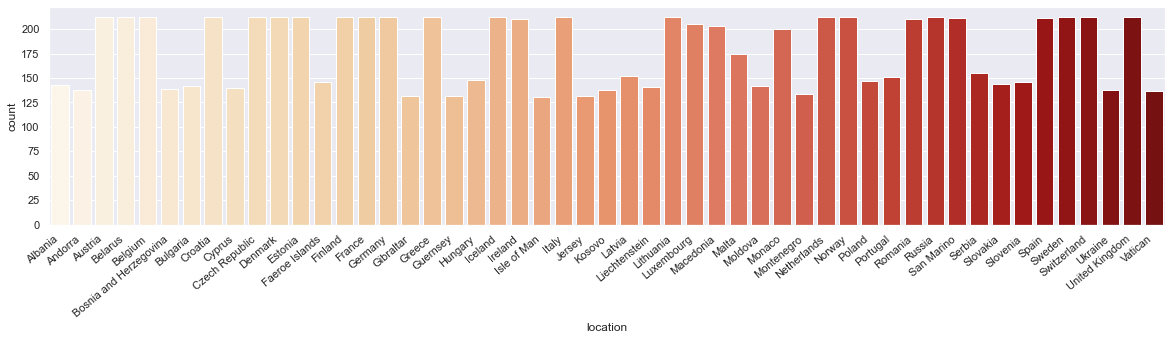

In [34]:
plt.figure(figsize=(20,4))
ax=sns.countplot(x ='location',data=df_eu, palette="OrRd")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

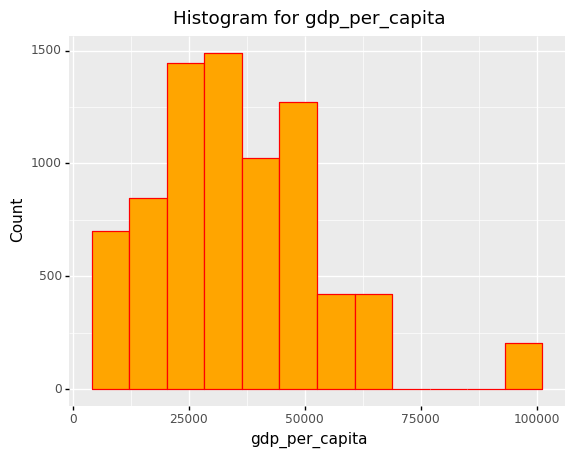

<ggplot: (116307112021)>

In [35]:
(ggplot(df_eu, aes(x='gdp_per_capita'))   
 + geom_histogram(bins=12,
                 color ="red", 
                 fill ="orange")
 + labs(title="Histogram for gdp_per_capita", x="gdp_per_capita", y="Count")
)

#### Median_Age

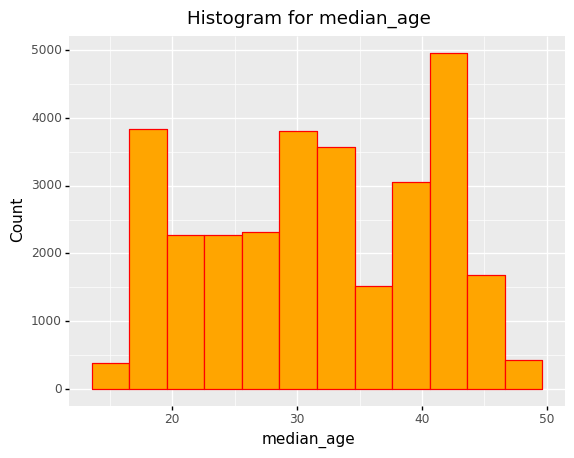

<ggplot: (116307155439)>

In [36]:
(ggplot(df, aes(x='median_age'))   
 + geom_histogram(bins=12,
                 color ="red", 
                 fill ="orange")
 + labs(title="Histogram for median_age", x="median_age", y="Count")
)

Text(0.5, 1.0, 'Total Number of Cases vs Total Deaths')

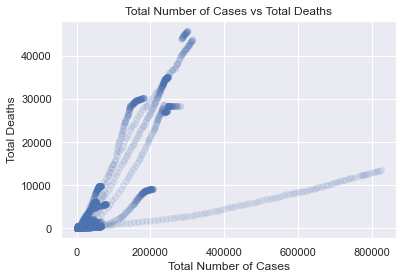

In [37]:
plt.scatter(df_eu['total_cases'], df_eu['total_deaths'], alpha = 0.1)
plt.xlabel("Total Number of Cases")
plt.ylabel("Total Deaths")
plt.title("Total Number of Cases vs Total Deaths")

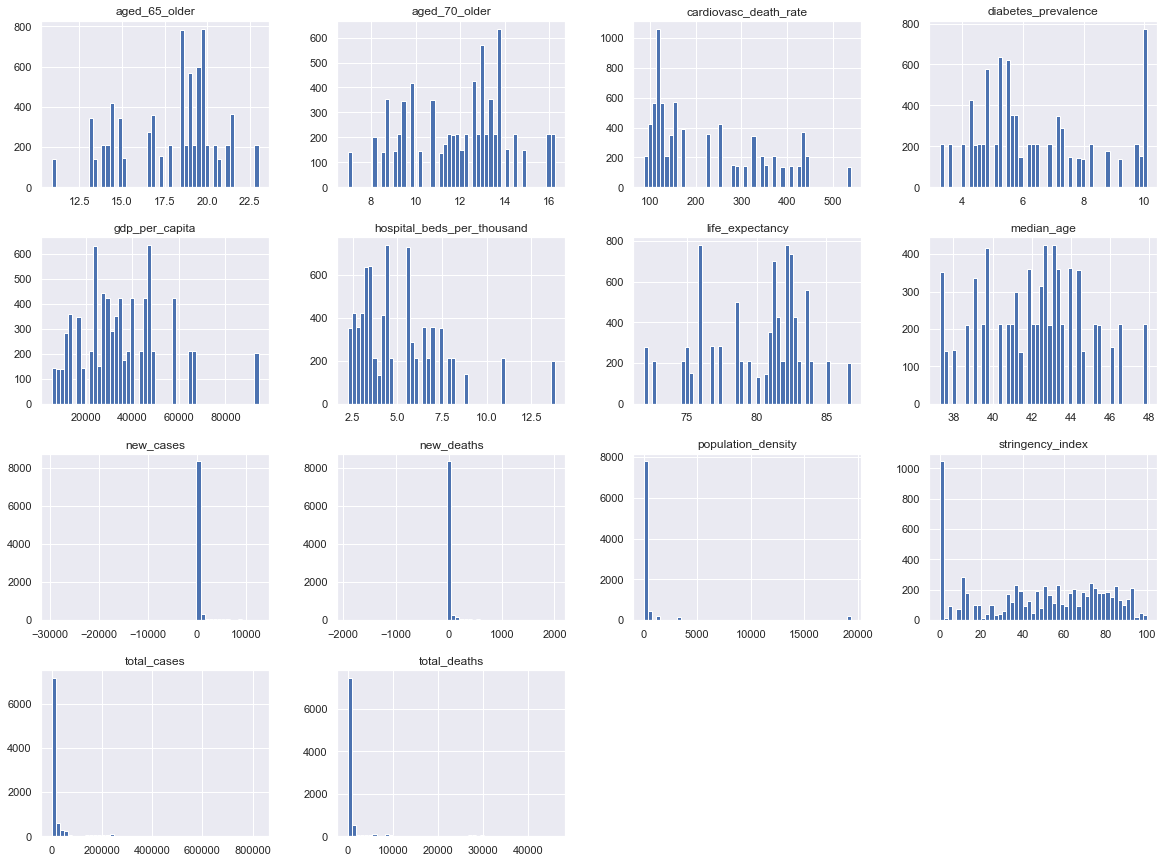

In [38]:
df_eu.hist(bins = 50, figsize = (20,15))
plt.show()

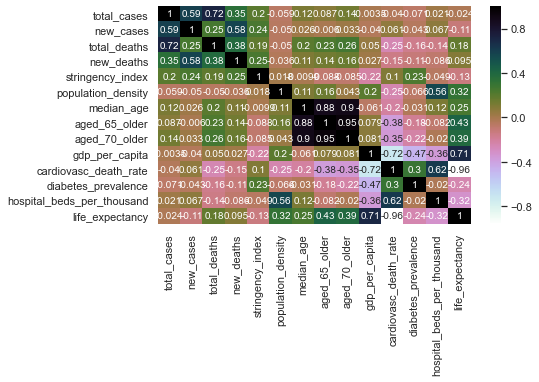

In [31]:
# heatmap for the correlation matrix for EU subset
plt.figure(figsize=(7,4))
sns.heatmap(df_eu.corr(),annot=True,cmap='cubehelix_r')
plt.show()

#### We can observe that new_deaths, new_cases re correlated. We can also see that median_age, aged_65_older and aged_70_older are correlated. We can include only median_age in our model.

In [18]:
# Taking a look at the outcome variable: 'total_deaths'
print(df_eu['total_deaths'].value_counts())

0.0        2651
1.0         269
9.0         142
5.0         136
10.0        125
13.0        120
24.0        109
2.0         106
28.0         96
31.0         95
3.0          84
4.0          79
42.0         76
30.0         67
69.0         65
19.0         64
110.0        55
52.0         52
6.0          48
17.0         45
111.0        43
8.0          42
7.0          41
51.0         37
41.0         36
29.0         36
18.0         33
12.0         32
23.0         32
328.0        31
           ... 
618.0         1
1466.0        1
466.0         1
484.0         1
9628.0        1
1521.0        1
8489.0        1
3807.0        1
38489.0       1
31763.0       1
9111.0        1
42589.0       1
28628.0       1
40542.0       1
28330.0       1
5452.0        1
620.0         1
2116.0        1
231.0         1
18276.0       1
1105.0        1
34405.0       1
7478.0        1
1129.0        1
3868.0        1
28413.0       1
16879.0       1
44650.0       1
2182.0        1
1693.0        1
Name: total_deaths, Leng

#### Convert Categorical Columns to Numerical

#### Get Dummy Variables

In [39]:
df_eu = pd.get_dummies(df_eu, columns = ['iso_code', 'location'], drop_first = True)

#### Statistical Exploratory Analysis

#### Describe Numeric Columns

In [40]:
df_eu.describe(include = [np.number])

,total_cases,new_cases,total_deaths,new_deaths,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,...,location_San Marino,location_Serbia,location_Slovakia,location_Slovenia,location_Spain,location_Sweden,location_Switzerland,location_Ukraine,location_United Kingdom,location_Vatican
count,9027.000000,9027.000000,9027.000000,9027.000000,7207.000000,8712.000000,7475.000000,7475.000000,7320.000000,7824.000000,...,9113.000000,9113.000000,9113.000000,9113.000000,9113.000000,9113.000000,9113.000000,9113.000000,9113.000000,9113.000000
mean,24474.764374,307.505262,2088.278609,22.369669,47.684135,650.715591,42.144187,17.862396,11.895578,35119.094811,...,0.023154,0.017009,0.015802,0.016021,0.023154,0.023263,0.023263,0.015143,0.023263,0.015033
std,73462.064768,1138.343507,6821.101474,101.066729,30.470777,2902.621269,2.555188,2.734599,2.198739,17827.141089,...,0.150400,0.129311,0.124714,0.125563,0.150400,0.150747,0.150747,0.122129,0.150747,0.121693
min,0.000000,-29726.000000,0.000000,-1918.000000,0.000000,3.404000,37.300000,10.864000,6.955000,5189.972000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,70.000000,0.000000,0.000000,0.000000,19.440000,65.180000,40.300000,15.070000,9.842000,23313.199000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1097.000000,11.000000,29.000000,0.000000,51.850000,106.749000,42.400000,18.577000,12.325000,32605.906000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9861.000000,132.000000,329.000000,4.000000,74.070000,205.859000,43.500000,19.718000,13.433000,45436.686000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,823515.000000,12640.000000,45878.000000,2004.000000,100.000000,19347.500000,47.900000,23.021000,16.240000,94277.965000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


As observed above in the correlation matrix we can only use one of three columns median, 65_older or 70_older as they are highly correlated,we can also see that total deaths are very highly correlated with total cases as well as new deaths. Let's experiment with dropping median, 70_older as 65_older would suffice and let's also drop new_deaths, new_cases

In [41]:
df_eu.drop(['aged_65_older','aged_70_older','new_cases','new_deaths'], axis = 1, inplace = True)

### Handling Missing Values

As seen from above df.isnull().sum(), there are several missing values in this dataset. Therefore, we first need to handle these missing values before proceeding further. We will use SimpleImputer for this.

In [42]:
df_eu.isnull().sum()

total_cases                     86
total_deaths                    86
stringency_index              1906
population_density             401
median_age                    1638
gdp_per_capita                1289
cardiovasc_death_rate         1500
diabetes_prevalence            948
hospital_beds_per_thousand    1086
life_expectancy                402
iso_code_AND                     0
iso_code_AUT                     0
iso_code_BEL                     0
iso_code_BGR                     0
iso_code_BIH                     0
iso_code_BLR                     0
iso_code_CHE                     0
iso_code_CYP                     0
iso_code_CZE                     0
iso_code_DEU                     0
iso_code_DNK                     0
iso_code_ESP                     0
iso_code_EST                     0
iso_code_FIN                     0
iso_code_FRA                     0
iso_code_FRO                     0
iso_code_GBR                     0
iso_code_GGY                     0
iso_code_GIB        

In [43]:
# Impute missing values using Imputer in sklearn.preprocessing
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer.fit(df_eu)
df_eu = pd.DataFrame(data=imputer.transform(df_eu) , columns=df_eu.columns)

#### Training - Testing Model

In [44]:
# Assign X as a DataFrame of features and y as a Series of the outcome variable
X = df_eu.drop('total_deaths', 1)
y = df_eu.total_deaths

In [45]:
X.isnull().sum().sort_values(ascending=False)

location_Vatican                   0
iso_code_LVA                       0
iso_code_GRC                       0
iso_code_HRV                       0
iso_code_HUN                       0
iso_code_IMN                       0
iso_code_IRL                       0
iso_code_ISL                       0
iso_code_ITA                       0
iso_code_JEY                       0
iso_code_LIE                       0
iso_code_LTU                       0
iso_code_LUX                       0
iso_code_MCO                       0
iso_code_SRB                       0
iso_code_MDA                       0
iso_code_MKD                       0
iso_code_MLT                       0
iso_code_MNE                       0
iso_code_NLD                       0
iso_code_NOR                       0
iso_code_OWID_KOS                  0
iso_code_POL                       0
iso_code_PRT                       0
iso_code_ROU                       0
iso_code_RUS                       0
iso_code_GIB                       0
i

In [46]:
# Feature Scaling and linear regression
scaler = StandardScaler() 
reg = LinearRegression()
steps = [('scaling', scaler), ('regression', reg)] 
pipeline = Pipeline(steps)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) 

pipeline.fit(X_train, y_train) 
y_pred = pipeline.predict(X_test) 
pipeline.score(X_test, y_test)

0.708217600829473

In [47]:
def train_score_regressor(sklearn_regressor, X_train, y_train, X_test, y_test, model_parameters, print_oob_score=False):
    """A helper function that:
        - Trains a regressor on training data
        - Scores data on training and test data
        - Returns a trained model
    """
    # Step 1: Initializing the sklearn regressor 
   
    regressor = sklearn_regressor(**model_parameters)  
    # Step 2: Training the algorithm using the X_train dataset of features and y_train, the associated target features

    regressor.fit(X_train, y_train)
    y_pred1 = regressor.predict (X_train)
    y_pred2 = regressor.predict (X_test)
   
    # Step 3: Calculating the score of the predictive power on the training and testing dataset.
    
    print ('Train score: %.3f' % r2_score(y_train, y_pred1))
    print ('Test score: %.3f' % r2_score(y_test, y_pred2))
   
    # Print the results!
    #your code goes here
    print(regressor)
    return regressor

In [48]:
trained_regressor = train_score_regressor(sklearn_regressor=DecisionTreeRegressor,
                                          X_train=X_train, 
                                          y_train=y_train, 
                                          X_test=X_test, 
                                          y_test=y_test, 
                                          model_parameters={'random_state':42})

Train score: 1.000
Test score: 1.000
DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')


This shows that it the decision tree is overfitting to the data. Let's get the best parameters with GridSearchCV and conduct hyperparameter tuning.

In [49]:
# Setting parameters to search through
parameters = {"max_depth":[3,4,5],
              "max_leaf_nodes":[2,3,4]}
decision_regressor= DecisionTreeRegressor(random_state=42)

# Initialize GridSearch and then fit
regressor=GridSearchCV(decision_regressor,parameters)
regressor.fit(X_train, y_train)
print(regressor)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [3, 4, 5], 'max_leaf_nodes': [2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)


In [50]:
regressor.best_estimator_.get_params()

{'criterion': 'mse',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': 4,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': 42,
 'splitter': 'best'}

In [51]:
# evaluating the tuned model
trained_regressor = train_score_regressor(sklearn_regressor=DecisionTreeRegressor,
                                          X_train=X_train, 
                                          y_train=y_train, 
                                          X_test=X_test, 
                                          y_test=y_test, 
                                          model_parameters=regressor.best_estimator_.get_params())

Train score: 0.924
Test score: 0.918
DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=4, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')


Once we apply the best parameters we get a good but not overfitted accuracy score.

# Conclusion 

We tried a regresion model based on location details to predict total deaths and got an accurancy of 75%. This is very helpful to take proactive measures at locations which might be prone to be hotspots based on prior trends that we have captured for the same. Moving beyond the data set that we worked with, continuous data input would greatly improve the accuracy of our models over time. The data sets we’re working with are volatile, subject to change as spikes in infections can occur. With more data, the models would be able to predict future outcomes more reliably and help us predict future hotspots, whether by age, GDP or other variables.